In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import OneHotEncoder
import time

# Some Exploration to understand our Data

In [2]:
def Explore(df):
        print('DataFrame Shape : \n')
        display(df.shape)
        print('DataFrame examples : \n')
        display(df.head())
        print("information about Dataset")
        display(df.info())
        print('DataFrame Description : \n')
        display(df.describe().T)

In [3]:
x=pd.read_csv('/kaggle/input/neolen-house-price-prediction/train.csv',index_col='Id')
x_test=pd.read_csv("/kaggle/input/neolen-house-price-prediction/test.csv",index_col='Id')

In [4]:
Explore(x)

DataFrame Shape : 



(1259, 80)

DataFrame examples : 



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


information about Dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1 to 1259
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1259 non-null   int64  
 1   MSZoning       1259 non-null   object 
 2   LotFrontage    1041 non-null   float64
 3   LotArea        1259 non-null   int64  
 4   Street         1259 non-null   object 
 5   Alley          76 non-null     object 
 6   LotShape       1259 non-null   object 
 7   LandContour    1259 non-null   object 
 8   Utilities      1259 non-null   object 
 9   LotConfig      1259 non-null   object 
 10  LandSlope      1259 non-null   object 
 11  Neighborhood   1259 non-null   object 
 12  Condition1     1259 non-null   object 
 13  Condition2     1259 non-null   object 
 14  BldgType       1259 non-null   object 
 15  HouseStyle     1259 non-null   object 
 16  OverallQual    1259 non-null   int64  
 17  OverallCond    1259 non-nu

None

DataFrame Description : 



,count,mean,std,min,25%,50%,75%,max
MSSubClass,1259.0,56.914218,42.353617,20.0,20.0,50.0,70.0,190.0
LotFrontage,1041.0,70.110471,23.522213,21.0,59.0,70.0,80.0,313.0
LotArea,1259.0,10524.300238,10391.598333,1300.0,7590.0,9452.0,11611.0,215245.0
OverallQual,1259.0,6.103257,1.381394,1.0,5.0,6.0,7.0,10.0
OverallCond,1259.0,5.570294,1.119465,1.0,5.0,5.0,6.0,9.0
YearBuilt,1259.0,1971.478157,29.933659,1875.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1259.0,1984.816521,20.617506,1950.0,1966.5,1993.0,2004.0,2010.0
MasVnrArea,1252.0,103.133387,182.185126,0.0,0.0,0.0,166.0,1600.0
BsmtFinSF1,1259.0,443.334392,439.025793,0.0,0.0,385.0,712.0,2260.0
BsmtFinSF2,1259.0,45.725973,159.593598,0.0,0.0,0.0,0.0,1474.0


In [5]:
Explore(x_test)

DataFrame Shape : 



(201, 79)

DataFrame examples : 



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1260,20,RL,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,FR2,...,80,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1261,60,RL,NaN,24682,Pave,NaN,IR3,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1262,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1263,50,RL,NaN,11250,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
1264,70,RL,60.0,13515,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal


information about Dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 1260 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     201 non-null    int64  
 1   MSZoning       201 non-null    object 
 2   LotFrontage    160 non-null    float64
 3   LotArea        201 non-null    int64  
 4   Street         201 non-null    object 
 5   Alley          15 non-null     object 
 6   LotShape       201 non-null    object 
 7   LandContour    201 non-null    object 
 8   Utilities      201 non-null    object 
 9   LotConfig      201 non-null    object 
 10  LandSlope      201 non-null    object 
 11  Neighborhood   201 non-null    object 
 12  Condition1     201 non-null    object 
 13  Condition2     201 non-null    object 
 14  BldgType       201 non-null    object 
 15  HouseStyle     201 non-null    object 
 16  OverallQual    201 non-null    int64  
 17  OverallCond    201 non-n

None

DataFrame Description : 



,count,mean,std,min,25%,50%,75%,max
MSSubClass,201.0,56.791045,42.071678,20.0,20.00,50.0,70.00,190.0
LotFrontage,160.0,69.656250,28.839623,21.0,55.75,65.5,80.00,313.0
LotArea,201.0,10470.024876,6894.847655,1533.0,7415.00,9572.0,11526.00,63887.0
OverallQual,201.0,6.074627,1.396210,3.0,5.00,6.0,7.00,10.0
OverallCond,201.0,5.606965,1.072265,3.0,5.00,5.0,6.00,9.0
YearBuilt,201.0,1969.950249,31.884126,1872.0,1949.00,1971.0,2001.00,2008.0
YearRemodAdd,201.0,1985.174129,20.868506,1950.0,1967.00,1994.0,2004.00,2009.0
MasVnrArea,200.0,107.140000,174.300585,0.0,0.00,0.0,165.75,796.0
BsmtFinSF1,201.0,445.552239,552.434601,0.0,0.00,360.0,719.00,5644.0
BsmtFinSF2,201.0,51.706468,172.065041,0.0,0.00,0.0,0.00,1029.0


# Observe Object Type Columns and understand it from it's describtion

In [6]:
x.loc[:, x.dtypes == object]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1256,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1257,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Some plots and Visualizations to understand our Data more and get intuition of its behaviour

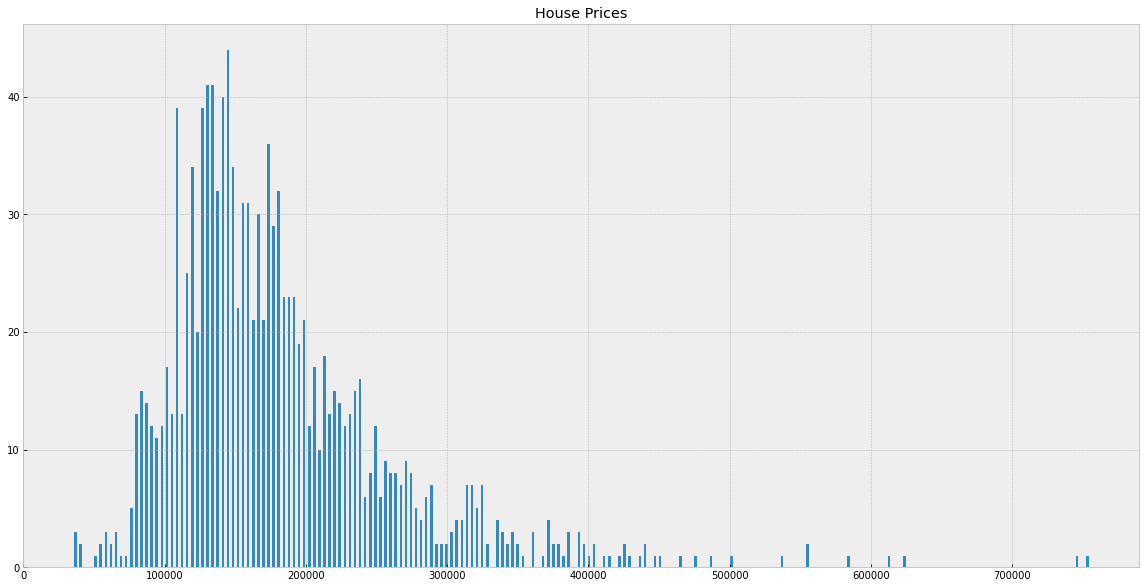

In [7]:
x['SalePrice'].hist(bins=200,rwidth = 0.5,figsize=(20,10))
plt.title('House Prices')
plt.show()

From previouse cell i observed that most houses are in range beween 100,000 and 250,000

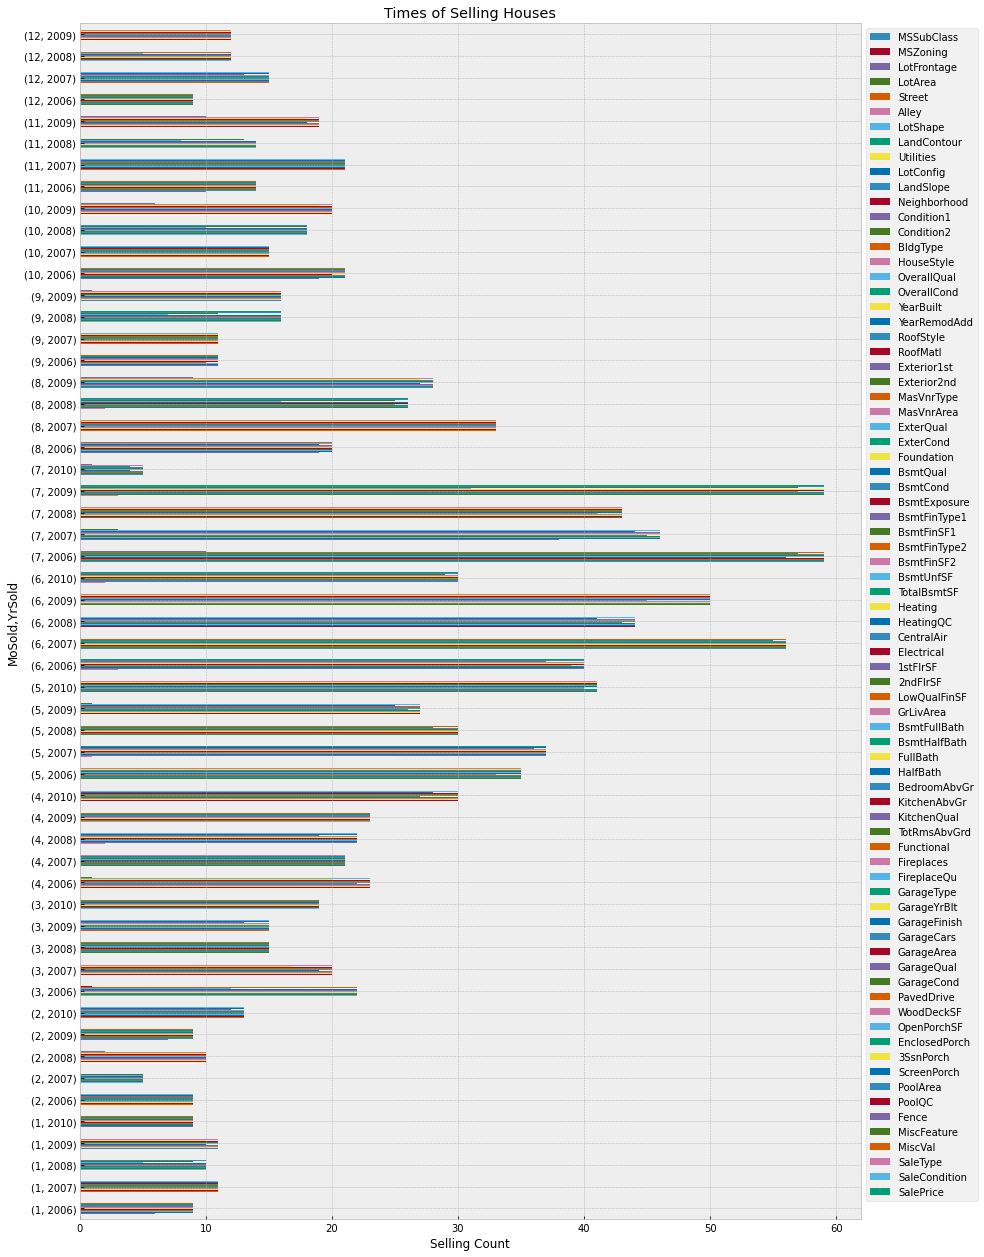

In [8]:
x.groupby(['MoSold','YrSold']).count().plot(kind='barh',figsize=(14,22))
plt.xlabel('Selling Count')
plt.title('Times of Selling Houses')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

from the previous plot i realised that most of the houses where sold in the summer months 6 and 7

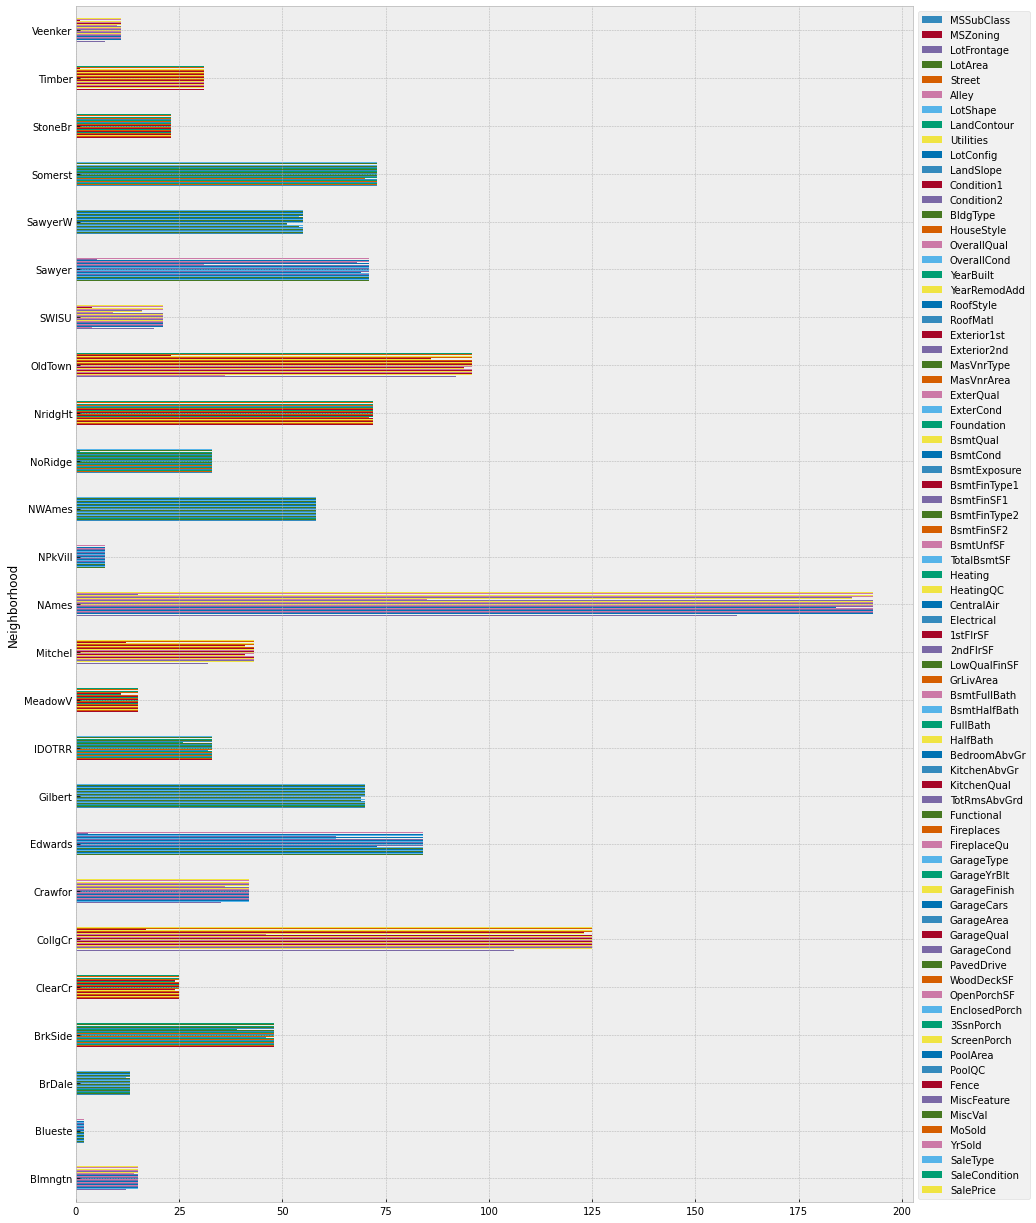

In [9]:
x.groupby(['Neighborhood']).count().plot(kind='barh',figsize=(15,22))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

from the previous plot i realised that most of the houses where sold in the NAmes neighbourhood

<AxesSubplot:>

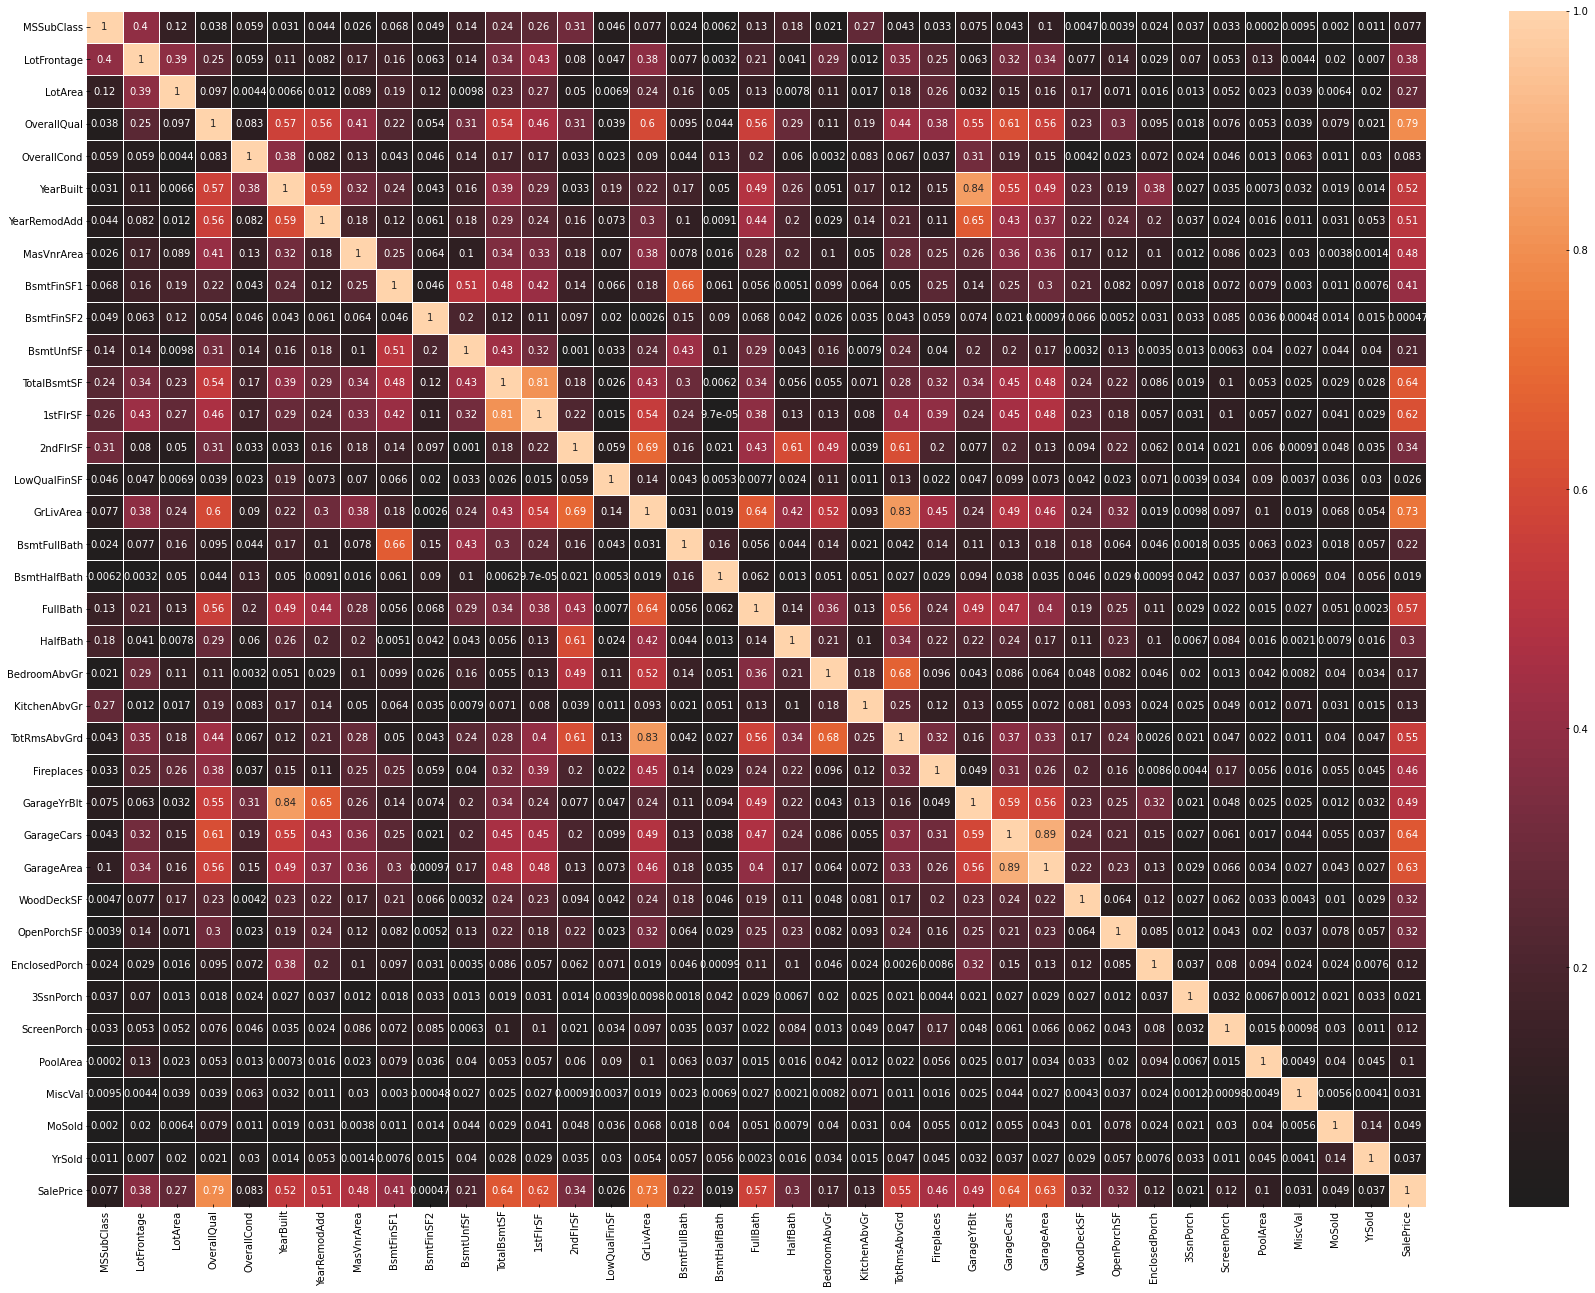

In [10]:
fig, ax = plt.subplots(figsize=(30,22))
corr_matrix = x.corr().abs()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax,center=0)

from the correlation heatmap i observed that the highest correlated features with the sale price where OverallQal which is normal and expected, but also the feature GrLivArea which is houses with  above ground level has high correlation with the SalePrice

# Preprocessing

Plotting percentage of missing values in each column

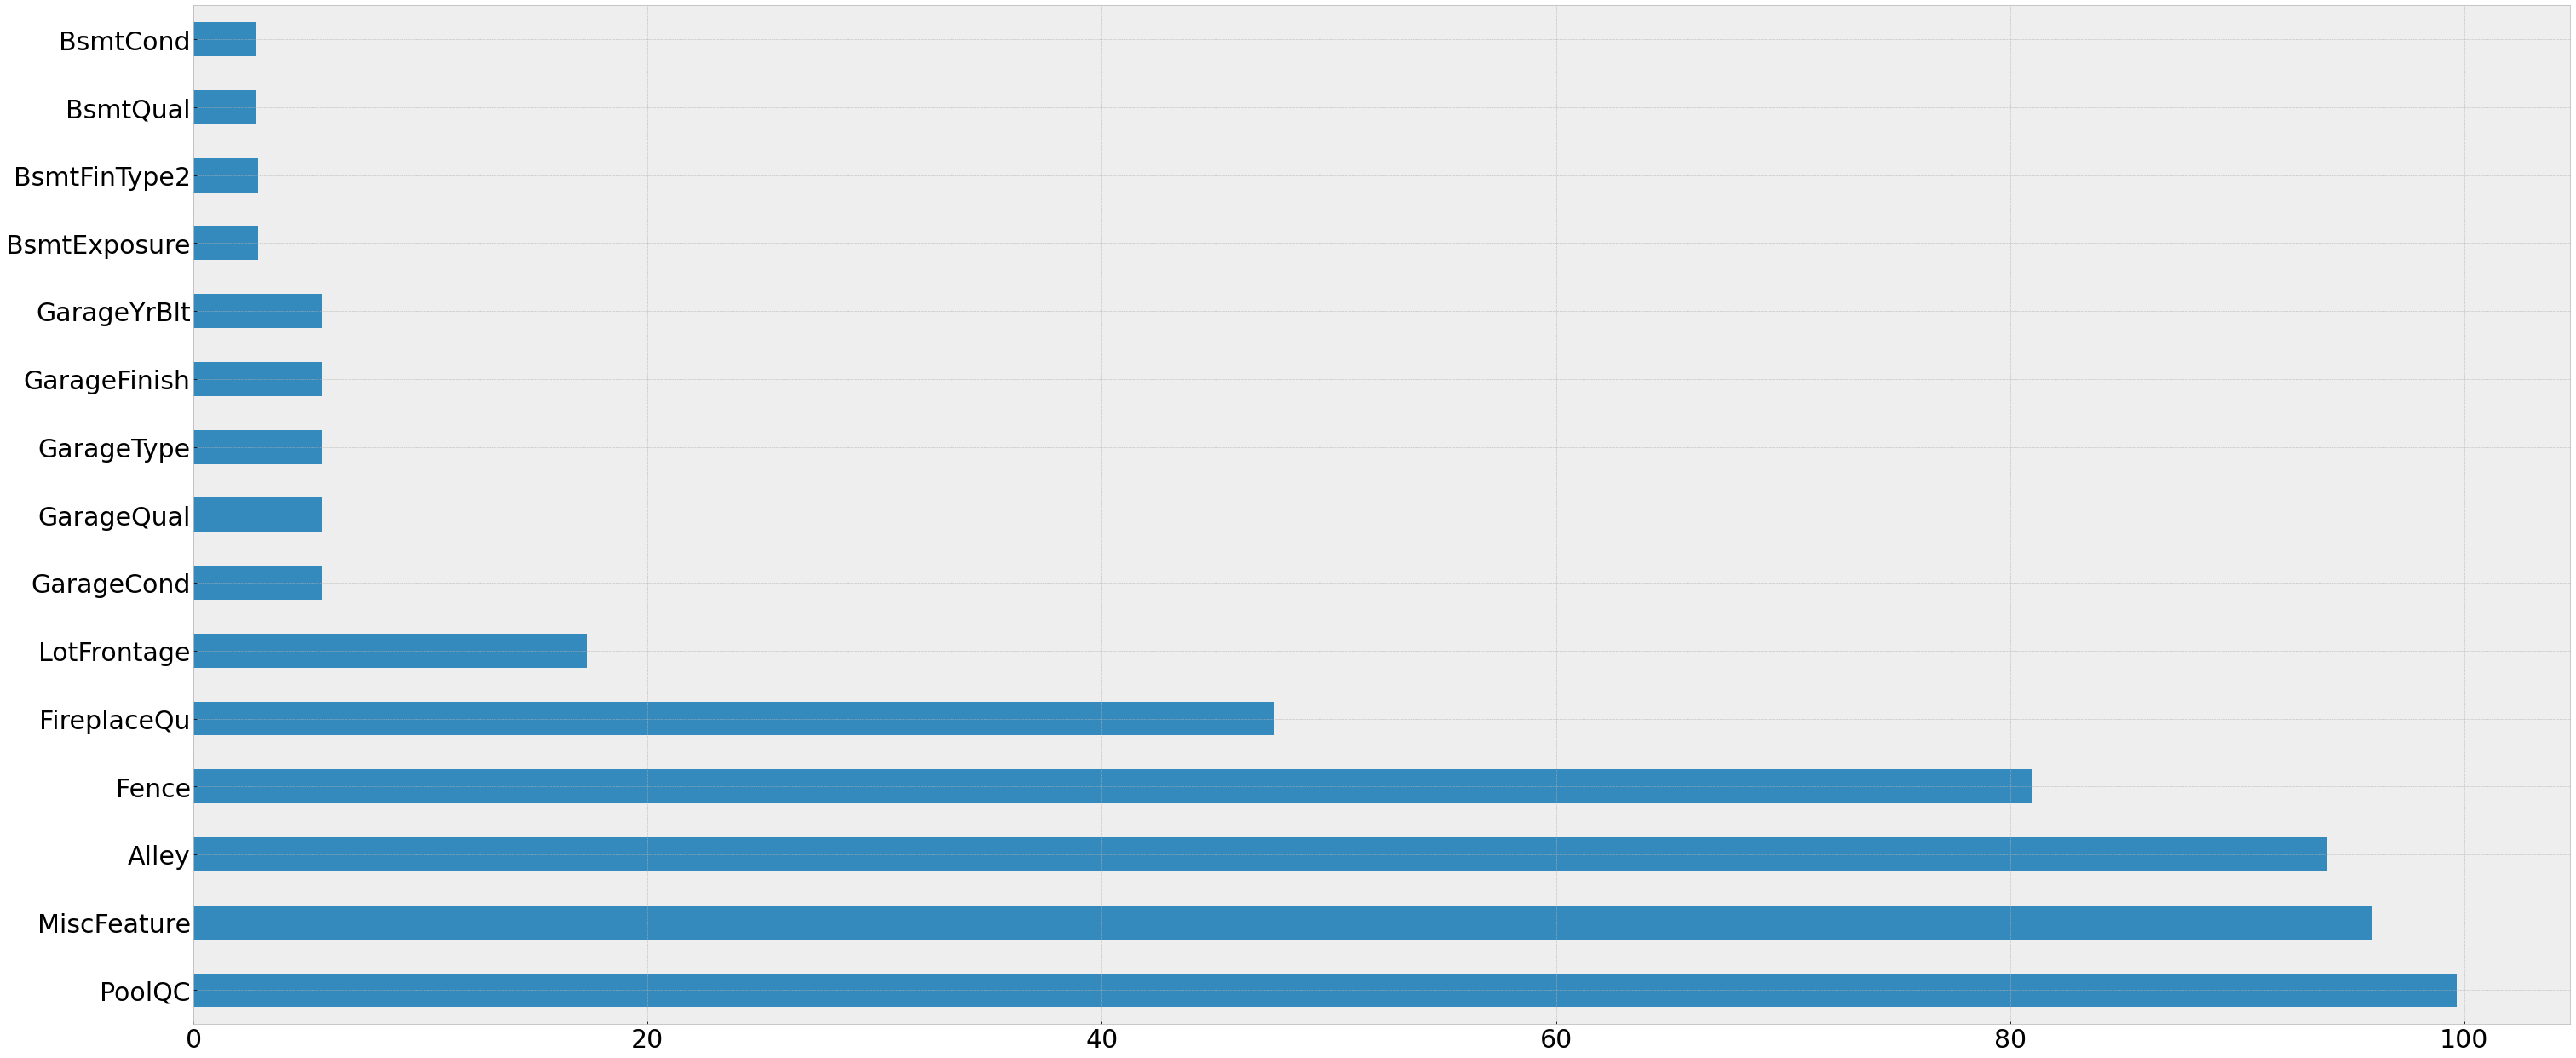

In [11]:
house_null_count=x.isnull().sum()*100/len(x)
miss_house_plot=house_null_count.sort_values(ascending=False).head(15).plot(kind='barh',figsize=(50,22),fontsize=30)

In [12]:
house_null_count.sort_values(ascending=False)[0:10]

PoolQC          99.682288
MiscFeature     95.949166
Alley           93.963463
Fence           80.937252
FireplaceQu     47.577442
LotFrontage     17.315330
GarageCond       5.639396
GarageQual       5.639396
GarageType       5.639396
GarageFinish     5.639396
dtype: float64

More than have of the values of 'Alley', 'PoolQC', 'Fence', 'MiscFeature' are missing and it is hard to impute them correctly and deal with them, so i decided to drop them even if i think some of them are important features but i afm afraid to confuse the midel with incorrect handling for this huge number of missing values.

In [13]:
drop_columns_list=x.columns[(house_null_count/100) > .50]
drop_columns_list=list(drop_columns_list)
drop_columns_list

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [14]:
x.drop(columns=['Alley', 'PoolQC', 'Fence','MiscFeature'], inplace=True)
x_test.drop(columns=['Alley', 'PoolQC', 'Fence','MiscFeature'], inplace=True)

In [15]:
house_row_null_count=x.isnull().sum(axis=1)
house_row_null_count.describe()

count    1259.000000
mean        1.082605
std         1.677829
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        11.000000
dtype: float64

# Handle Object types columns

In [16]:
obj_cols=x.select_dtypes('object').columns
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [17]:
for col in obj_cols:
    print('{} column has {} unique values'.format(col,x[col].nunique()))

MSZoning column has 5 unique values
Street column has 2 unique values
LotShape column has 4 unique values
LandContour column has 4 unique values
Utilities column has 2 unique values
LotConfig column has 5 unique values
LandSlope column has 3 unique values
Neighborhood column has 25 unique values
Condition1 column has 9 unique values
Condition2 column has 8 unique values
BldgType column has 5 unique values
HouseStyle column has 8 unique values
RoofStyle column has 6 unique values
RoofMatl column has 6 unique values
Exterior1st column has 14 unique values
Exterior2nd column has 15 unique values
MasVnrType column has 4 unique values
ExterQual column has 4 unique values
ExterCond column has 5 unique values
Foundation column has 6 unique values
BsmtQual column has 4 unique values
BsmtCond column has 4 unique values
BsmtExposure column has 4 unique values
BsmtFinType1 column has 6 unique values
BsmtFinType2 column has 6 unique values
Heating column has 5 unique values
HeatingQC column has 5 

* **From previous cell exterior1st and exterior2nd and neighborhood columns has many unique values so they might increase complexity of the model after encoding but after reading the describtion of data i thought they might be important features so i decided to encode them and depend on the highly correlated features with the resultant encodings of all data to get smaller chunck of mmost usefull features to train the model**

**From describtion of data i found that there are ordinal features like Utilities, CentralAir, LandSlope, ExterQual, ExterCond,
BsmtQual,BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond
so i decided to encode them manually.**

In [18]:
print(x['Utilities'].unique())
print(x['CentralAir'].unique())
print(x['LandSlope'].unique())
print(x['ExterQual'].unique())
print(x['ExterCond'].unique())
print(x['BsmtQual'].unique())
print(x['BsmtCond'].unique())
print(x['BsmtExposure'].unique())
print(x['BsmtFinType1'].unique())
print(x['BsmtFinType2'].unique())
print(x['HeatingQC'].unique())
print(x['KitchenQual'].unique())
print(x['FireplaceQu'].unique())
print(x['GarageQual'].unique())
print(x['GarageCond'].unique())

['AllPub' 'NoSeWa']
['Y' 'N']
['Gtl' 'Mod' 'Sev']
['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Po' 'Ex']
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Ex' 'Gd' 'TA' 'Fa' 'Po']
['Gd' 'TA' 'Ex' 'Fa']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [19]:
x['Utilities'] = x.Utilities.map({'AllPub':1,'NoSeWa':0})
x['CentralAir'] = x.CentralAir.map({'Y':1,'N':0})
x['LandSlope'] = x.LandSlope.map({'Gtl':0,'Mod':1,'Sev':3})
x['ExterQual'] = x.ExterQual.map({'Gd':2,'TA':1,'Ex':3,'Fa':0})
x['ExterCond'] = x.ExterCond.map({'Gd':3,'TA':2,'Ex':4,'Fa':1,'Po':0})
x['BsmtQual'] = x.BsmtQual.map({'Fa':1,'TA':2,'Gd':3,'Ex':4})
x['BsmtCond'] = x.BsmtCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4})
x['BsmtExposure'] = x.BsmtExposure.map({'No':1,'Mn':2,'Av':3,'Gd':4})
x['BsmtFinType1'] = x.BsmtFinType1.map({'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
x['BsmtFinType2'] = x.BsmtFinType2.map({'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
x['HeatingQC'] = x.HeatingQC.map({'Gd':3,'TA':2,'Ex':4,'Fa':1,'Po':0})
x['KitchenQual'] = x.KitchenQual.map({'Gd':2,'TA':1,'Ex':3,'Fa':0})
x['FireplaceQu'] = x.FireplaceQu.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
x['GarageQual'] = x.GarageQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
x['GarageCond'] = x.GarageCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

x_test['Utilities'] = x_test.Utilities.map({'AllPub':1,'NoSeWa':0})
x_test['CentralAir'] = x_test.CentralAir.map({'Y':1,'N':0})
x_test['LandSlope'] = x_test.LandSlope.map({'Gtl':0,'Mod':1,'Sev':3})
x_test['ExterQual'] = x_test.ExterQual.map({'Gd':2,'TA':1,'Ex':3,'Fa':0})
x_test['ExterCond'] = x_test.ExterCond.map({'Gd':3,'TA':2,'Ex':4,'Fa':1,'Po':0})
x_test['BsmtQual'] = x_test.BsmtQual.map({'Fa':1,'TA':2,'Gd':3,'Ex':4})
x_test['BsmtCond'] = x_test.BsmtCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4})
x_test['BsmtExposure'] = x_test.BsmtExposure.map({'No':1,'Mn':2,'Av':3,'Gd':4})
x_test['BsmtFinType1'] = x_test.BsmtFinType1.map({'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
x_test['BsmtFinType2'] = x_test.BsmtFinType2.map({'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
x_test['HeatingQC'] = x_test.HeatingQC.map({'Gd':3,'TA':2,'Ex':4,'Fa':1,'Po':0})
x_test['KitchenQual'] = x_test.KitchenQual.map({'Gd':2,'TA':1,'Ex':3,'Fa':0})
x_test['FireplaceQu'] = x_test.FireplaceQu.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
x_test['GarageQual'] = x_test.GarageQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
x_test['GarageCond'] = x_test.GarageCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

**as the following features were ordinal but in the discribtion it stated that the nan values in these columns mean that this feature is missing so i decided to fill the missing with 0 to try to indicat to the model that it has the least weight as these features are ordinal features**

In [20]:
x['BsmtQual'].fillna(0, inplace=True)
x['BsmtCond'].fillna(0, inplace=True)
x['BsmtExposure'].fillna(0, inplace=True)
x['BsmtFinType1'].fillna(0, inplace=True)
x['BsmtFinType2'].fillna(0, inplace=True)
x['FireplaceQu'].fillna(0, inplace=True)
x['GarageQual'].fillna(0, inplace=True)
x['GarageCond'].fillna(0, inplace=True)

x_test['BsmtQual'].fillna(0, inplace=True)
x_test['BsmtCond'].fillna(0, inplace=True)
x_test['BsmtExposure'].fillna(0, inplace=True)
x_test['BsmtFinType1'].fillna(0, inplace=True)
x_test['BsmtFinType2'].fillna(0, inplace=True)
x_test['FireplaceQu'].fillna(0, inplace=True)
x_test['GarageQual'].fillna(0, inplace=True)
x_test['GarageCond'].fillna(0, inplace=True)

In [21]:
print(x.shape)
print(x_test.shape)

(1259, 76)
(201, 75)


In [22]:
obj_cols=x.select_dtypes('object').columns
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

# Encoding the non ordinal features

In [23]:
x=pd.get_dummies(x,columns=obj_cols)
x_test=pd.get_dummies(x_test,columns=obj_cols)

In [24]:
print(x.shape)
print(x_test.shape)

(1259, 222)
(201, 190)


# Using Correlation to get the most correalated features with respect to our label SalePrice

In [25]:
corelation=abs(x.corr()['SalePrice']) >= 0.4
corelation[corelation==True]


OverallQual             True
YearBuilt               True
YearRemodAdd            True
MasVnrArea              True
ExterQual               True
BsmtQual                True
BsmtFinSF1              True
TotalBsmtSF             True
HeatingQC               True
1stFlrSF                True
GrLivArea               True
FullBath                True
KitchenQual             True
TotRmsAbvGrd            True
Fireplaces              True
FireplaceQu             True
GarageYrBlt             True
GarageCars              True
GarageArea              True
SalePrice               True
Neighborhood_NridgHt    True
Foundation_PConc        True
GarageFinish_Fin        True
GarageFinish_Unf        True
Name: SalePrice, dtype: bool

In [26]:
x=x[corelation.index[corelation]]
corelation=corelation.drop(['SalePrice'])
x_test=x_test[corelation.index[corelation]]

In [27]:
x.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,...,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,SalePrice,Neighborhood_NridgHt,Foundation_PConc,GarageFinish_Fin,GarageFinish_Unf
Id,,,,,,,,,,,,,,,,,,,,,
1,7,2003,2003,196.0,2,3.0,706,856,4,856,...,0,0.0,2003.0,2,548,208500,0,1,0,0
2,6,1976,1976,0.0,1,3.0,978,1262,4,1262,...,1,3.0,1976.0,2,460,181500,0,0,0,0
3,7,2001,2002,162.0,2,3.0,486,920,4,920,...,1,3.0,2001.0,2,608,223500,0,1,0,0
4,7,1915,1970,0.0,1,2.0,216,756,3,961,...,1,4.0,1998.0,3,642,140000,0,0,0,1
5,8,2000,2000,350.0,2,3.0,655,1145,4,1145,...,1,3.0,2000.0,3,836,250000,0,1,0,0


# Checking missing values in the remaining features

In [28]:
missing_val_count_by_column = (x.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MasVnrArea      7
GarageYrBlt    71
dtype: int64


# Check the distribution of these two columns to decide what startegy to fill nan values

<AxesSubplot:>

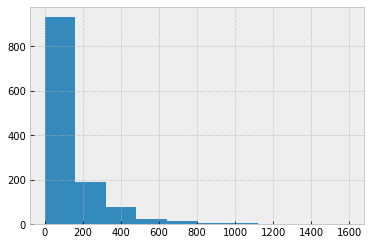

In [29]:
x['MasVnrArea'].hist()

<AxesSubplot:>

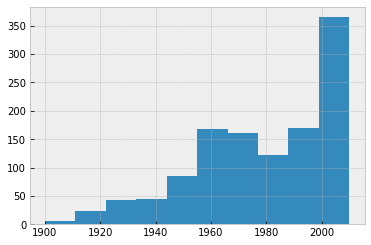

In [30]:
x['GarageYrBlt'].hist()

**The two features are skewed one for the right and the other to the left so i decided to fill its missing values using median**

In [31]:
x['MasVnrArea']=x['MasVnrArea'].fillna(x['MasVnrArea'].median())
x['GarageYrBlt']=x['GarageYrBlt'].fillna(x['GarageYrBlt'].median())

x_test['MasVnrArea']=x_test['MasVnrArea'].fillna(x_test['MasVnrArea'].median())
x_test['GarageYrBlt']=x_test['GarageYrBlt'].fillna(x_test['GarageYrBlt'].median())

In [32]:
x.var()

OverallQual             1.908249e+00
YearBuilt               8.960240e+02
YearRemodAdd            4.250816e+02
MasVnrArea              3.306559e+04
ExterQual               3.286405e-01
BsmtQual                6.315407e-01
BsmtFinSF1              1.927436e+05
TotalBsmtSF             1.787806e+05
HeatingQC               9.137921e-01
1stFlrSF                1.412940e+05
GrLivArea               2.640581e+05
FullBath                3.055179e-01
KitchenQual             4.409208e-01
TotRmsAbvGrd            2.591966e+00
Fireplaces              4.118973e-01
FireplaceQu             3.251623e+00
GarageYrBlt             5.766664e+02
GarageCars              5.529081e-01
GarageArea              4.515727e+04
SalePrice               6.494430e+09
Neighborhood_NridgHt    5.396061e-02
Foundation_PConc        2.469709e-01
GarageFinish_Fin        1.837138e-01
GarageFinish_Unf        2.431713e-01
dtype: float64

# Data Standardization

In [33]:
# scaler=StandardScaler()
# x_imputed_cols=x_imputed.columns
# x_test_imputed_cols=x_test_imputed.columns
# x_imputed=pd.DataFrame(scaler.fit_transform(x_imputed),columns=x_imputed_cols)
# x_test_imputed=pd.DataFrame(scaler.fit_transform(x_test_imputed),columns=x_test_imputed_cols)

In [34]:
# scaler=MinMaxScaler()
# x_imputed_cols=x_imputed.columns
# x_test_imputed_cols=x_test_imputed.columns
# x_imputed=pd.DataFrame(scaler.fit_transform(x_imputed.astype(float)),columns=x_imputed_cols)
# x_test_imputed=pd.DataFrame(scaler.fit_transform(x_test_imputed.astype(float)),columns=x_test_imputed_cols)

In [35]:
Y=x['SalePrice']
x=x.drop(['SalePrice'],axis=1)

**Try Tanh Normalization Technique.
Tanh estimators are considered to be very efficient and robust normalization technique. It is not sensitive to outliers and it also converges faster than Z-score normalization.
so i decided to try to use it and see the results.**

In [36]:
x_mean=x.mean()
x_std=x.std()
print(x_mean[x_mean>1])

x_test_mean=x_test.mean()
x_test_std=x_test.std()
print(x_test_mean[x_test_mean>1])

OverallQual        6.103257
YearBuilt       1971.478157
YearRemodAdd    1984.816521
MasVnrArea       102.559968
ExterQual          1.397141
BsmtQual           2.514694
BsmtFinSF1       443.334392
TotalBsmtSF     1054.079428
HeatingQC          3.142176
1stFlrSF        1158.503574
GrLivArea       1507.630659
FullBath           1.559174
KitchenQual        1.507546
TotRmsAbvGrd       6.493249
FireplaceQu        1.803813
GarageYrBlt     1978.518666
GarageCars         1.760127
GarageArea       471.674345
dtype: float64
OverallQual        6.074627
YearBuilt       1969.950249
YearRemodAdd    1985.174129
MasVnrArea       106.606965
ExterQual          1.388060
BsmtQual           2.512438
BsmtFinSF1       445.552239
TotalBsmtSF     1078.412935
HeatingQC          3.164179
1stFlrSF        1188.452736
GrLivArea       1564.527363
FullBath           1.601990
KitchenQual        1.537313
TotRmsAbvGrd       6.671642
FireplaceQu        1.960199
GarageYrBlt     1978.980100
GarageCars         1.810945
Garag

In [37]:
x=0.5*(np.tanh(0.01*((x-x_mean)/x_std))+1)
x_test=0.5*(np.tanh(0.01*((x_test-x_test_mean)/x_test_std))+1)

# After observing the results i got using the three methods i found that surprisengly the tanh normalization got the best results, it might be an indicator of much outliers found in the dataset

In [38]:
print(x.var())
print(x_test.var())

OverallQual             0.000025
YearBuilt               0.000025
YearRemodAdd            0.000025
MasVnrArea              0.000025
ExterQual               0.000025
BsmtQual                0.000025
BsmtFinSF1              0.000025
TotalBsmtSF             0.000025
HeatingQC               0.000025
1stFlrSF                0.000025
GrLivArea               0.000025
FullBath                0.000025
KitchenQual             0.000025
TotRmsAbvGrd            0.000025
Fireplaces              0.000025
FireplaceQu             0.000025
GarageYrBlt             0.000025
GarageCars              0.000025
GarageArea              0.000025
Neighborhood_NridgHt    0.000025
Foundation_PConc        0.000025
GarageFinish_Fin        0.000025
GarageFinish_Unf        0.000025
dtype: float64
OverallQual             0.000025
YearBuilt               0.000025
YearRemodAdd            0.000025
MasVnrArea              0.000025
ExterQual               0.000025
BsmtQual                0.000025
BsmtFinSF1              0.00

# PCA

**Before trying to use correlation to select the most highly correlated features with SalePrice i tried to use the PCA after encoding most of the features but the results were not good enough**

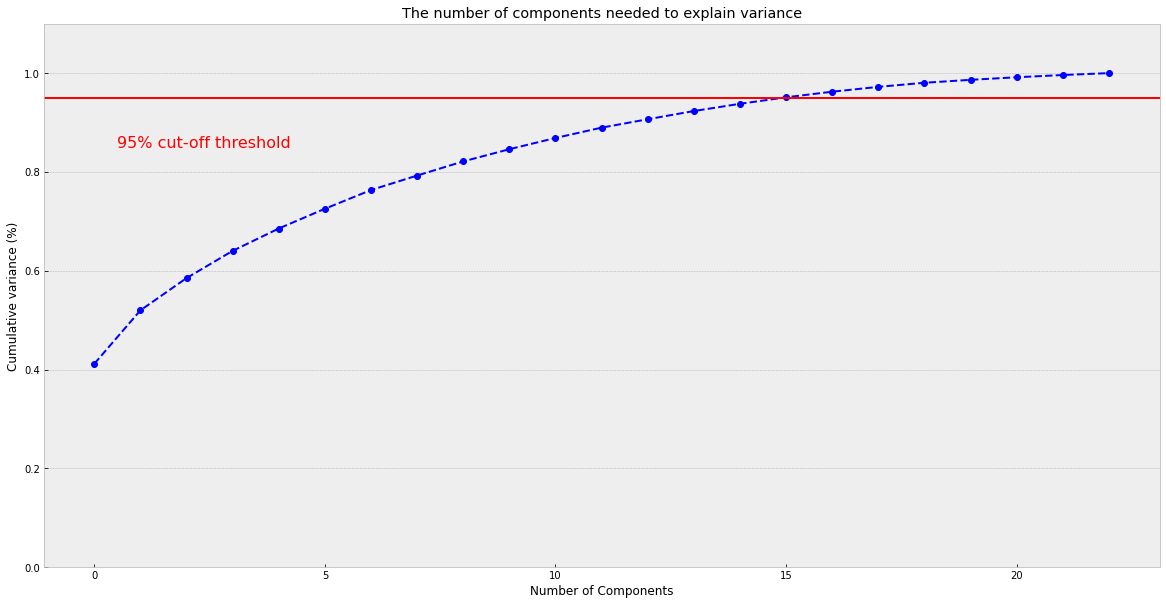

In [39]:
pca = PCA().fit(x)
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()

y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [40]:
# def reduce_data(df,comp_number=130):
#     pca = PCA(n_components=comp_number).fit(df)
#     reduced_data = pca.transform(df)
#     reduced_data = pd.DataFrame(reduced_data)
#     print(pca.explained_variance_ratio_.sum())
#     return reduced_data

In [41]:
# reduced_x=reduce_data(x_imputed)
# reduced_x_test=reduce_data(x_test_imputed)

In [42]:
# print(reduced_x.shape)
# print(reduced_x_test.shape)
# print(Y.shape)

# Split X and Y into Train and Validation with Ratios 80:20

In [43]:
x_train, x_validate, y_train, y_validate=train_test_split(x, Y, test_size=0.20, random_state=42,shuffle=True)

# Trying Different Models using GridSearchCV and select the best two models to try them

In [44]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
svm=SVR()
xgb=XGBRegressor()
adab=AdaBoostRegressor()
class_list=[lr, dt,rf,svm,xgb,adab]
for model in class_list:
        start = time.time()
        grid = GridSearchCV(estimator=model, param_grid={}, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1,verbose=3)
        grid.fit(x, Y)
        end = time.time()
        print(model, '\n', -grid.best_score_,'\n', round(end-start),grid.best_estimator_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


LinearRegression() 
 33022.9866355163 
 2 LinearRegression()
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


DecisionTreeRegressor() 
 43350.194074756415 
 1 DecisionTreeRegressor()
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


RandomForestRegressor() 
 31717.515508346027 
 2 RandomForestRegressor()
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


SVR() 
 82335.28679216457 
 0 SVR()
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.2s finished


XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None) 
 35716.56449290614 
 45 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


AdaBoostRegressor() 
 36164.016852162495 
 0 AdaBoostRegressor()


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


**the best two models were Random Forest and XGBooost**

**Trying Diffrent Compinations of the hyperparameters with RandomForest to get the best compination**

In [45]:
# param_grid = {'n_estimators': [50,100,150,300,500],
#               'min_samples_split': [2,3],
#              'warm_start':[True,False]}
# kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# best = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=kfold, n_jobs=-1,verbose=3)
# best.fit(x, Y)

# print(-best.best_score_,best.best_estimator_,best.best_params_)

In [46]:
# model=RandomForestRegressor(min_samples_split=3, n_estimators=50, warm_start=True)
# model.fit(x_train,y_train)
# prediction=model.predict(x_validate)
# print(mean_squared_error(y_validate, prediction,squared=False))

In [47]:
# model=XGBRegressor()
# model.fit(x_train,y_train)
# prediction=model.predict(x_validate)
# print(mean_squared_error(y_validate,prediction,squared=False))


In [48]:
final_model=XGBRegressor()
final_model.fit(x,Y)
final_predict=final_model.predict(x_test)
submission = pd.DataFrame({'Id': x_test.index,'SalePrice': final_predict})
submission

,Id,SalePrice
0,1260,142696.187500
1,1261,183679.359375
2,1262,119511.625000
3,1263,150874.484375
4,1264,153308.531250
...,...,...
196,1456,177179.171875
197,1457,202245.593750
198,1458,283707.250000
199,1459,125189.703125


In [49]:
submission.to_csv('/kaggle/working/submission_XGB_TanNorm_TopFeatures_final.csv', index=False)

# Best Model Was XGBoost Model